In [1]:
import string
import pandas as pd
import numpy as np 
import re 
import matplotlib.pyplot as plt 
import seaborn as sns
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score

c:\Users\VuongQuan14\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset("mutiyama/alt", "alt-parallel")

data = []
for item in dataset['train']:
    if 'lo' in item['translation'] and 'vi' in item['translation']:
        if item['translation']['lo'] is not None and item['translation']['vi'] is not None:
            data.append({'text': item['translation']['lo'], 'label': 'lo'})
            data.append({'text': item['translation']['vi'], 'label': 'vi'})
df = pd.DataFrame(data)

print(df.head())


                                                text label
0  ອິຕາລີໄດ້ເສຍໃຫ້ປ໊ອກຕຸຍການ 31 ຕໍ່ 5 ໃນພູລ C ຂອງ...    lo
1  Ý đã đánh bại Bồ Đào Nha với tỉ số 31-5 ở Bảng...    vi
2  ແອນເດຣຍ ມາຊີ່ ໄດ້ເປີດການທຳຄະແນນໃນນາທີທີ່ສີ່ໃຫ້...    lo
3  Andrea Maisi đã mở tỉ số cho Ý ở phút thứ tư v...    vi
4  ເຖິງວ່າຈະມີການຄວບຄຸມເກມເປັນສ່ວນໃຫຍ່ໃນເຄິ່ງທຳອິ...    lo


In [28]:
vi_data = df[df['label'] == 'vi']
print(vi_data)

                                                    text label
1      ý đã đánh bại bồ đào nha với tỉ số 31 5 ở bảng...    vi
3      andrea maisi đã mở tỉ số cho ý ở phút thứ tư v...    vi
5      chiếm thế áp đảo trong hầu hết hiệp đầu nhưng ...    vi
7      bồ đào nha chưa bao giờ từ bỏ và david penalva...    vi
9      ý đã dẫn 16 5 ở hiệp đầu nhưng ngang sức với b...    vi
...                                                  ...   ...
36165   chúng tôi có một chính sách tuyển dụng rất tố...    vi
36167  thám tử cảnh sát cao cấp barry hills của cảnh ...    vi
36169   tôi nghĩ rằng nỗi ám ảnh của cậu ấy chỉ làm c...    vi
36171  được mô tả là mặc một chiếc áo khoác giống với...    vi
36173  cậu ta cũng bị buộc tội ăn cắp một xe điện vào...    vi

[18087 rows x 2 columns]


In [22]:
lao_count = df['label'].value_counts().get('lo', 0)
print(f"Số lượng văn bản là tiếng Lào: {lao_count}")

Số lượng văn bản là tiếng Lào: 18087


In [23]:
vi_count = df['label'].value_counts().get('vi', 0)
print(f"Số lượng văn bản là tiếng Việt: {vi_count}")

Số lượng văn bản là tiếng Việt: 18087


<function matplotlib.pyplot.show(close=None, block=None)>

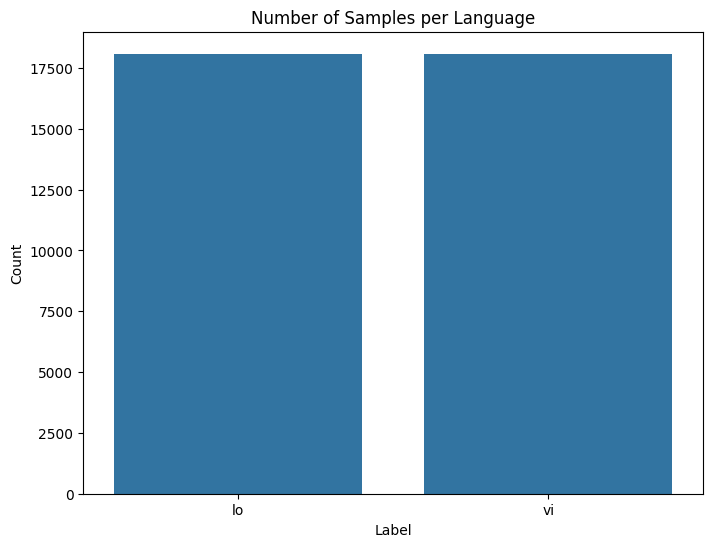

In [3]:
plt.figure(figsize=(8,6))
sns.countplot(x='label', data=df)
plt.title("Number of Samples per Language")
plt.xlabel('Label')
plt.ylabel('Count')
plt.show

In [5]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
# Remove punctuation 
def remove_punc(text):
    for pun in string.punctuation:
        text = text.replace(pun," ")
    text = text.lower()
    return text

In [7]:
df['text'] = df['text'].apply(remove_punc)
df.head()

,text,label
0,ອິຕາລີໄດ້ເສຍໃຫ້ປ໊ອກຕຸຍການ 31 ຕໍ່ 5 ໃນພູລ c ຂອງ...,lo
1,ý đã đánh bại bồ đào nha với tỉ số 31 5 ở bảng...,vi
2,ແອນເດຣຍ ມາຊີ່ ໄດ້ເປີດການທຳຄະແນນໃນນາທີທີ່ສີ່ໃຫ້...,lo
3,andrea maisi đã mở tỉ số cho ý ở phút thứ tư v...,vi
4,ເຖິງວ່າຈະມີການຄວບຄຸມເກມເປັນສ່ວນໃຫຍ່ໃນເຄິ່ງທຳອິ...,lo


In [8]:
X = df.iloc[:,0]
Y = df.iloc[:,1]

In [9]:
print(X)

0        ອິຕາລີໄດ້ເສຍໃຫ້ປ໊ອກຕຸຍການ 31 ຕໍ່ 5 ໃນພູລ c ຂອງ...
1        ý đã đánh bại bồ đào nha với tỉ số 31 5 ở bảng...
2        ແອນເດຣຍ ມາຊີ່ ໄດ້ເປີດການທຳຄະແນນໃນນາທີທີ່ສີ່ໃຫ້...
3        andrea maisi đã mở tỉ số cho ý ở phút thứ tư v...
4        ເຖິງວ່າຈະມີການຄວບຄຸມເກມເປັນສ່ວນໃຫຍ່ໃນເຄິ່ງທຳອິ...
                               ...                        
36169     tôi nghĩ rằng nỗi ám ảnh của cậu ấy chỉ làm c...
36170    ການອະທິບາຍການນຸ່ງເສື້ອ jacket ຄ້າຍຄືກັນກັບເຄື່...
36171    được mô tả là mặc một chiếc áo khoác giống với...
36172    ລາວໄດ້ຖືກກ່າວຫາການລັກລົດລາງໃນຕອນກາງຄືນວັນສຸກ ໃ...
36173    cậu ta cũng bị buộc tội ăn cắp một xe điện vào...
Name: text, Length: 36174, dtype: object


In [10]:
#chia tập dữ liệu 
X_train , x_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2)

In [11]:
X_train

6195     bắt đầu ở vị trí thứ ba và thứ tư lần lượt là ...
19961     bây giờ mọi người có thể lưu và sắp xếp các h...
14488    ຫລັງຈາກການເລືອກຕັ້ງ ມີປະມານ 600 ຄົນຖືກຈັບໂດຍລັ...
7158     ເຂດອີຣັກ ເຊິ່ງມີຜູ້ເສຍຊີວິດຕ້ອງສົງໄສ ເກີດຂຶ້ນໃ...
29954    ແນວໃດກໍ່ຕາມ ທ່ານໂຈນາທານ ທ໊ອດ ຄະນະກໍາມະການສະຫະພ...
                               ...                        
17483    ngày 15 tháng mười năm 2006  mchale và khoảng ...
6367     thẩm phán tòa án tối cao hoa kỳ john paul stev...
22709    những bài hát được biểu diễn sẽ có  english te...
19124    ມີການອະທິບາຍການປ່ຽນແປງການລາຍງານຄະດີອາຍານີ້ວ່າເ...
35350    ໃນ​ເວ​ລາ​ນີ້​ ກະ​ຊວງ​ກະ​ສິ​ກໍາ​ແລະ​ຜູ້​ຊ່ຽວ​ຊາ...
Name: text, Length: 28939, dtype: object

In [12]:
from sklearn import feature_extraction

In [13]:
vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1,1),analyzer= 'char')
# unigrams

Building the models

In [14]:
from sklearn import pipeline
from sklearn import linear_model

In [15]:
model = pipeline.Pipeline([('vec',vec),('clf', linear_model.LogisticRegression())])

In [16]:
model.fit(X_train,Y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char')),
                ('clf', LogisticRegression())])

In [17]:
model.classes_

array(['lo', 'vi'], dtype=object)

In [18]:
x_test

6170     ປະເທດສະເປນ ໃຊ້ຄວາມບໍ່ແນ່ນອນ ກັບການເປັນສະມາຊິກສ...
25336    ຍັງ​ມີ​ຕົວ​ເລກວັນ​ທີອີກ​ຈຳ​ນວນຫຼາຍ​ທີ່​ໜ້າ​ສົນ...
3116     ມັນໄດ້ເລີ່ມປະສົບການ ການບິນຂອງ ຍົນແບບນ້ອຍ 15 ບ່...
54       ໄຊຊະນະດັ່ງກ່າວເຮັດໃຫ້ ຈອນສັນ ມີ 190 ຄະແນນ  ລວມ...
29416    ລາວຍັງເປັນຄົນທີ່ບໍ່ລໍາອຽງ ໃນການບັນຍາຍເກມແຂ່ງຂັ...
                               ...                        
2666     ລາວໄດ້ເວົ້າວ່າ ມິສຊາຍສາມາດເດີນທາງໃນຄວາມໄວ 328 ...
33499    hiện tại  nước này sẽ vẫn để binh lính đóng qu...
26699    australia có một trung tâm tạm giam ở nauru dà...
32862    ການພິຈາລະນາຄະດີໃນວັນຈັນແມ່ນບໍ່ປົກກະຕິ ພ້ອມຍັງມ...
23899     ai là người chịu trách nhiệm cho sự nhục nhã ...
Name: text, Length: 7235, dtype: object

In [19]:
predict_values = model.predict(x_test)

In [20]:
from sklearn import metrics

In [21]:
metrics.accuracy_score(Y_test, predict_values)*100

99.9861782999309

In [30]:
incorrect_predictions = results[results['actual'] != results['predicted']]

# Đếm số lượng dự đoán sai
num_incorrect = len(incorrect_predictions)

# In kết quả
print(f"Số lượng dự đoán sai: {num_incorrect}")
print("Các dự đoán sai:")
print(incorrect_predictions)

Số lượng dự đoán sai: 1
Các dự đoán sai:
                                                   text actual predicted
2790  ຜູ້ຫຼິ້ນໃນທີມໄດ້ຖືກວາງໂຕຈາກ ສະໂມສອນຫຼາຍແຫ່ງໃນປ...     lo        vi


In [35]:
incorrect_predictions.to_csv('D:/Học kỳ phụ 2024/NLP/Project/Code/incorrect_predictions.csv', index=False)